# Cálculo de integrales por el método de Monte Carlo

Consiedramos aquí la estimación de integrales unidimensionales

I = $\int_a^b g(x)dx,$

suponiendo que

$0 \leq g(x) \leq c$, $a \leq x \leq b$

## Método de acierto y error

Sea $(X, Y)$ un vector aleatorio uniformemente distribuido sobre el rectángulo $\Omega$ con 
función densidad de probabilidad

$f_{xY}(x, y) = \frac{1}{c(b-a)}$ si $(x,y) \in \Omega$

$f_{xY}(x, y) = 0$ en otro caso.


Si $S = {(x,y)| y \leq g(x)}$ es el área bajo la curva, la probabilidad de que $(x,y)$ caiga bajo la curva $g(x)$ es:

$p = \frac{area S}{area \Omega} = \frac{\int_a^b g(x)dx}{c(b-a)} = \frac{I}{c(b-a)}$

Si generamos $N$ vectores aleatorios independientes $(X_1, Y_1)$, $(X_2, Y_2)$, ..., $(X_N, Y_N)$, $p$ puede 
ser estimado por:

$\hat{p} = \frac{N_A}{N}$,

donde $N_A$ es el número de aciertos.

Y la integral puede ser estimada por:

$ I\approx \theta_1 = c(b-a)\frac{N_A}{N}$

## Ejercicio

1. Mostrar que $\theta_1 $ es un estimador insesgado, es decir, que $E(\theta_1 ) = pc(b-a) = I$
2. Mostrar que $V(\theta_1 )=\frac{I}{N}[c(b-a)-I]$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Como ejemplo, calculemos una integral no soluble por métodos analíticos:
    
$\int_0^1 \sqrt( \arctan x ) dx$

Primero, definimos y graficamos la función de prueba:

In [4]:
#Definimos la función de prueba.
def test_function(x):
    return(np.sqrt(np.arctan(x)))

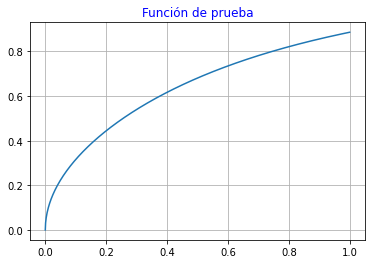

In [5]:
#Graficamos la función de prueba.
X=np.linspace(0,1,1000)
plt.grid(True)
plt.title('Función de prueba', color='b')
plt.plot(X, test_function(X))
plt.show()

Observemos que la función es continua y monotona creciente, lo cual nos asegura que está acotada en $[0,1]$, es decir,
podemos dibujarla completa dentro de un rectángulo.

In [6]:
def integrate(x1,x2,func=test_function,n=100000):
    X=np.linspace(x1,x2,1000)
    y1=0
    y2=max((func(X)))
    print(x1,x2,y1,y2)
    area=(x2-x1)*(y2-y1)
    check=[]
    xs=[]
    ys=[]
    for i in range(n):
        x=np.random.uniform(x1,x2,1)
        xs.append(x)
        y=np.random.uniform(y1,y2,1)
        ys.append(y)
        if abs(y)>abs(func(x)) or y<0:
            check.append(0)
        else:
            check.append(1)
    return(np.mean(check)*area,xs,ys,check)

0 1 0 0.8862269254527579
0.6302845893820015
0 1 0 0.8862269254527579


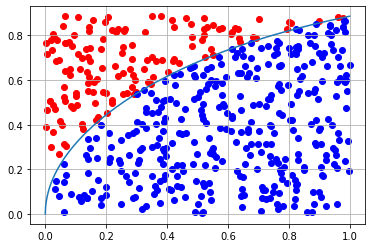

In [7]:
#print(integrate(0,1)[0])
print(integrate(0,1,test_function)[0])
_,x,y,c=integrate(0,1,n=500)
df=pd.DataFrame()
df['x']=x
df['y']=y
df['c']=c

X=np.linspace(0,1,1000)
plt.grid(True)
plt.plot(X,test_function(X))
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red')
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue')
plt.show()

## Método de la media muestral

Reescribimos la integral $I$ como:

$I = \int_a^b \frac{g(x)}{f_X(x)}f_X(x) dx$,

donde $f_X(x)$ es cualquier función densidad de distribución tal que $f_X(x) > 0$ cuando $g(x)\neq 0 $

Entonces:

$I = E[\frac{g(X)}{f_X(X)}]$


donde usaremos por simplicidad:

$f_X(x) = \frac{1}{b-a}$ si $a<x<b$

$f_X(x) = 0$ en otro caso.

Asi

$I = (b-a)E(g(x))$

y usamos el estimador:

$\theta_2 = (b-a)\frac{1}{N}\sum_{i=1}^{N}g(X_i)$

In [8]:
#Esta función calcula la integral usando la ley de los grandes números, es decir,
#la aproxima como el promedio del muestreo aleatorio.
def integ(func=test_function, n=10000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u=np.random.random_sample()
        muestreo.append(u)
        y=func(u)
        suma.append(y)

    return(np.mean(suma))

print("El valor de la integral es:", integ())

El valor de la integral es: 0.629268834219657


## Ejercicio

Estimar las integrales:

1. $\int_0^1 (1 - x^2)^{\frac{3}{2}} dx$

2. $\int_{-2}^2 \exp (x + x^2) dx$

0 1 0 1.0
0.58659
0 1 0 1.0


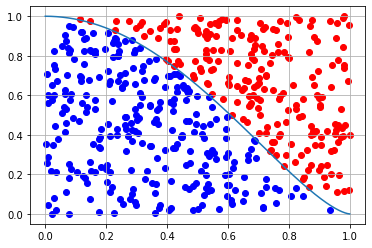

In [13]:
#Primera integral
def test_function(x):
    return (1-x**2)**(3/2)
def integrate(x1,x2,func=test_function,n=100000):
    X=np.linspace(x1,x2,1000)
    y1=0
    y2=max((func(X)))
    print(x1,x2,y1,y2)
    area=(x2-x1)*(y2-y1)
    check=[]
    xs=[]
    ys=[]
    for i in range(n):
        x=np.random.uniform(x1,x2,1)
        xs.append(x)
        y=np.random.uniform(y1,y2,1)
        ys.append(y)
        if abs(y)>abs(func(x)) or y<0:
            check.append(0)
        else:
            check.append(1)
    return(np.mean(check)*area,xs,ys,check)
print(integrate(0,1,test_function)[0])
_,x,y,c=integrate(0,1,n=500)
df=pd.DataFrame()
df['x']=x
df['y']=y
df['c']=c

X=np.linspace(0,1,1000)
plt.grid(True)
plt.plot(X,test_function(X))
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red')
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue')
plt.show()

-2 2 0 403.4287934927351
93.90208597336903
-2 2 0 403.4287934927351


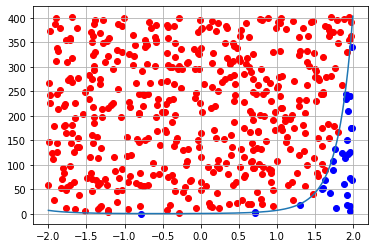

In [18]:
#Segunda integral
def test_function(x):
    return np.exp(x+x**2)
def integrate(x1,x2,func=test_function,n=100000):
    X=np.linspace(x1,x2,1000)
    y1=0
    y2=max((func(X)))
    print(x1,x2,y1,y2)
    area=(x2-x1)*(y2-y1)
    check=[]
    xs=[]
    ys=[]
    for i in range(n):
        x=np.random.uniform(x1,x2,1)
        xs.append(x)
        y=np.random.uniform(y1,y2,1)
        ys.append(y)
        if abs(y)>abs(func(x)) or y<0:
            check.append(0)
        else:
            check.append(1)
    return(np.mean(check)*area,xs,ys,check)
print(integrate(-2,2,test_function)[0])
_,x,y,c=integrate(-2,2,n=500)
df=pd.DataFrame()
df['x']=x
df['y']=y
df['c']=c

X=np.linspace(-2,2,1000)
plt.grid(True)
plt.plot(X,test_function(X))
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red')
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue')
plt.show()

Bibliografía

Simulation and the Monte Carlo Method. Reuven Y. Rubinstein, John Wiley & Sons, 1981  (Capítulo 4)